# COVID-19 in Los Angeles County

Data courtesy Los Angeles County Department of Public Health.
The archived daily press releases can be found [here](http://publichealth.lacounty.gov/phcommon/public/media/mediaCOVIDdisplay.cfm?unit=media&ou=ph&prog=media)

The source code is hosted on GitHub at [amhirsch/gla_covid_19](https://github.com/amhirsch/gla_covid_19)

**Last Update:** Saturday, June 6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import gla_covid_19.analyze_lacph_daily as analyze_lacph_daily
import gla_covid_19.const as const
import gla_covid_19.lacph_prid as lacph_prid
import gla_covid_19.scrape_lacph_daily as scrape_lacph_daily

sns.set()

def adjust_ax(observations):
    min_date = observations[const.DATE].min()
    max_date = observations[const.DATE].max()
    plt.xlim((min_date, max_date))
    plt.xticks(pd.date_range(min_date, max_date, freq='SMS'), rotation=45)
    plt.show()

all_dates = tuple(map(lambda x: scrape_lacph_daily.query_single_date(x), lacph_prid.DAILY_STATS))

## Aggregate Statistics

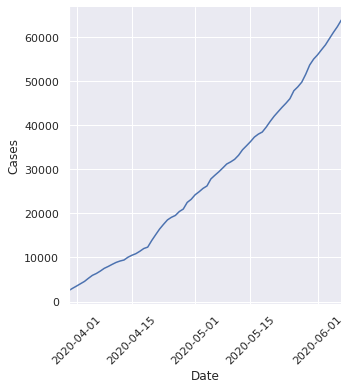

In [2]:
summary_stats = analyze_lacph_daily.make_df_dates(all_dates)

g = sns.relplot(x=const.DATE, y=const.CASES, kind='line', data=summary_stats)
adjust_ax(summary_stats)

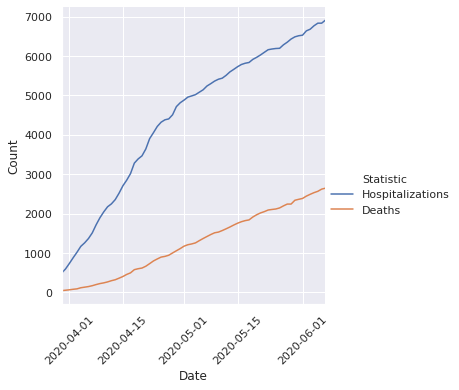

In [3]:
summary_stats = pd.melt(summary_stats, id_vars='Date', var_name='Statistic', value_name='Count')
summary_stats = summary_stats[summary_stats['Statistic'] != const.CASES]
summary_stats['Statistic'] = summary_stats['Statistic'].astype('category')

sns.relplot(x=const.DATE, y='Count', kind='line', hue='Statistic', data=summary_stats)
adjust_ax(summary_stats)

## Disaggregate Statistics

### Age Group

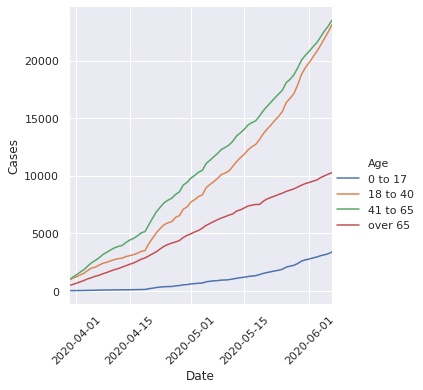

In [4]:
by_age = analyze_lacph_daily.make_by_age(all_dates)
# Remove seemingly extraneous data point
by_age = by_age[(by_age[const.AGE_GROUP] != const.AGE_OVER_65) | (by_age[const.DATE] != pd.Timestamp('2020-04-13'))]

g = sns.relplot(x='Date', y='Cases', hue=const.AGE_GROUP, kind='line', data=by_age)
adjust_ax(by_age)

### Race / Ethnicity

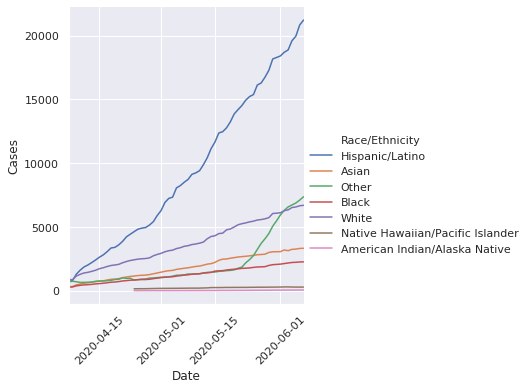

In [5]:
by_race = analyze_lacph_daily.make_by_race(all_dates)

sns.relplot(x=const.DATE, y=const.CASES, hue=const.RACE, kind='line', data=by_race)
adjust_ax(by_race)

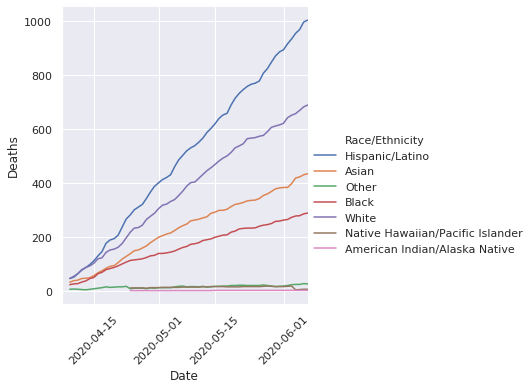

In [6]:
sns.relplot(x=const.DATE, y=const.DEATHS, hue=const.RACE, kind='line', data=by_race)
adjust_ax(by_race)

### Gender

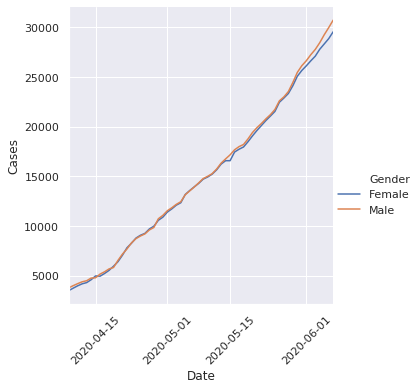

In [7]:
by_gender = analyze_lacph_daily.make_by_gender(all_dates[10:])

sns.relplot(x=const.DATE, y=const.CASES, hue=const.GENDER, kind='line', data=by_gender)
adjust_ax(by_gender)

## Location

In [10]:
df_raw_location = analyze_lacph_daily.make_by_loc(all_dates)

In [17]:
selected_region = const.REGION
del selected_region['Angeles Forest']
del selected_region['Santa Monica Mountains']
del selected_region['Antelope Valley']
df_region = analyze_lacph_daily.location_cases_comparison(df_raw_location, const.REGION)

In [18]:
df_region.head(15)

,Date,Region,"Cases per 100,000"
0,2020-03-30,Central LA,47.17
1,2020-03-30,Harbor,20.78
2,2020-03-30,San Gabriel Valley,6.63
3,2020-03-30,San Fernando Valley,21.75
4,2020-03-30,Verdugos,20.46
5,2020-03-30,Pomona Valley,3.48
6,2020-03-30,South Bay,28.06
7,2020-03-30,South LA,10.43
8,2020-03-30,Northeast LA,18.62
9,2020-03-30,Southeast,13.22


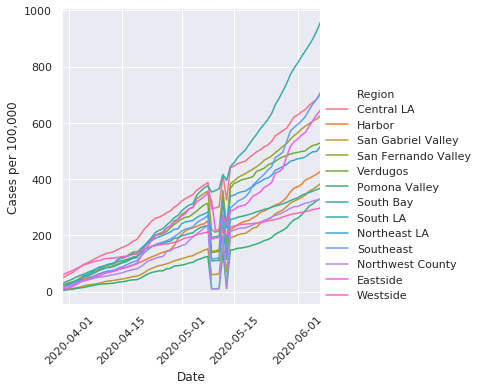

In [19]:
sns.relplot(x=const.DATE, y=const.CASES_NORMALIZED, hue='Region', kind='line', data=df_region)
adjust_ax(df_region)